## 장애인취업정보 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Pycret/장애인취업정보.csv', encoding='euc-kr')

In [ ]:
df['근무지역'] = df['근무지역'].str[:2]
df = df.dropna()

In [ ]:
df

,순번,취업일자,연령,장애유형,중증여부,근무지역,취업직종대분류
0,1.0,2022-06-01,26.0,정신장애,중증,경기,경영·행정·사무직
1,2.0,2022-01-01,28.0,지적장애,중증,충북,경영·행정·사무직
2,3.0,2022-01-01,19.0,지적장애,중증,충북,경영·행정·사무직
3,4.0,2022-01-01,22.0,지적장애,중증,충북,경영·행정·사무직
4,5.0,2022-01-01,23.0,지적장애,중증,충북,경영·행정·사무직
...,...,...,...,...,...,...,...
45112,45113.0,2022-12-02,72.0,지체장애,경증,강원,청소 및 기타 개인서비스직
45113,45114.0,2022-12-19,24.0,지체장애,경증,경기,정보통신 연구개발직 및 공학기술직
45114,45115.0,2022-03-21,67.0,지체장애,중증,경기,제조 단순직
45115,45116.0,2022-09-15,28.0,시각장애,경증,대구,경영·행정·사무직


## ml_df 설정

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
ml_df = df[['연령', '장애유형', '중증여부', '근무지역','취업직종대분류']].copy()

In [ ]:
ml_df

,연령,장애유형,중증여부,근무지역,취업직종대분류
0,26.0,정신장애,중증,경기,경영·행정·사무직
1,28.0,지적장애,중증,충북,경영·행정·사무직
2,19.0,지적장애,중증,충북,경영·행정·사무직
3,22.0,지적장애,중증,충북,경영·행정·사무직
4,23.0,지적장애,중증,충북,경영·행정·사무직
...,...,...,...,...,...
45112,72.0,지체장애,경증,강원,청소 및 기타 개인서비스직
45113,24.0,지체장애,경증,경기,정보통신 연구개발직 및 공학기술직
45114,67.0,지체장애,중증,경기,제조 단순직
45115,28.0,시각장애,경증,대구,경영·행정·사무직


# 연아_AUTOML

In [ ]:
!pip install pycaret --quiet
!pip install shap --quiet
!pip install --upgrade pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.6 MB/s e

In [ ]:
unique_labels = ml_df['취업직종대분류'].unique()
print(unique_labels)

['경영·행정·사무직' '청소 및 기타 개인서비스직' '돌봄 서비스직(간병·육아)' '인쇄·목재·공예 및 기타 설치·정비·생산직'
 '제조 단순직' '보건·의료직' '경호·경비직' '금융·보험직' '전기·전자 설치·정비·생산직' '운전·운송직' '사회복지·종교직'
 '식품 가공·생산직' '관리직(임원·부서장)' '화학·환경 설치·정비·생산직' '예술·디자인·방송직' '스포츠·레크리에이션직'
 '영업·판매직' '교육직' '기계 설치·정비·생산직' '제조 연구개발직 및 공학기술직' '정보통신 설치·정비직' '음식 서비스직'
 '건설·채굴직' '정보통신 연구개발직 및 공학기술직' '건설·채굴 연구개발직 및 공학기술직' '여행·숙박·오락 서비스직'
 '섬유·의복 생산직' '미용·예식 서비스직' '금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)' '농림어업직'
 '자연·생명과학 연구직' '법률직' '인문·사회과학 연구직']


In [ ]:
# '인문·사회과학 연구직'에 해당하는 값의 개수 출력
count_unseen_label = (ml_df['취업직종대분류'] == '인문·사회과학 연구직').sum()
print(f"인문·사회과학 연구직에 해당하는 값의 개수: {count_unseen_label}")

인문·사회과학 연구직에 해당하는 값의 개수: 2


In [ ]:
from sklearn.model_selection import train_test_split

# 데이터 제거 (둘다 2개씩 있어서 지움)
ml_df = ml_df[ml_df['취업직종대분류'] != '인문·사회과학 연구직']
ml_df = ml_df[ml_df['취업직종대분류'] != '자연·생명과학 연구직']

# 제거 후 데이터 확인
print(ml_df['취업직종대분류'].value_counts())

경영·행정·사무직                            16940
청소 및 기타 개인서비스직                       11692
제조 단순직                                3230
경호·경비직                                2162
보건·의료직                                2012
음식 서비스직                               1562
돌봄 서비스직(간병·육아)                         966
인쇄·목재·공예 및 기타 설치·정비·생산직                883
영업·판매직                                 680
스포츠·레크리에이션직                            625
전기·전자 설치·정비·생산직                        568
관리직(임원·부서장)                            448
예술·디자인·방송직                             436
식품 가공·생산직                              416
사회복지·종교직                               406
운전·운송직                                 361
기계 설치·정비·생산직                           349
화학·환경 설치·정비·생산직                        161
건설·채굴직                                 155
제조 연구개발직 및 공학기술직                       150
섬유·의복 생산직                              147
교육직                                    145
미용·예식 서비스직                             142
농림어업직      

In [ ]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 18.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.2.0 requires scipy~=1.10.1, but you have scipy 1.11.4 which is incompatible.


In [ ]:
!pip install --upgrade pycaret

  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
from pycaret.classification import *

# PyCaret에서 사용할 데이터셋 로드
exp1 = setup(data=ml_df, target='취업직종대분류')

# '인문·사회과학 연구직' 레이블을 가진 데이터 제거
ml_df = ml_df[ml_df['취업직종대분류'] != '인문·사회과학 연구직']

# 모델 생성
rf = create_model('rf', fold=5)

,Description,Value
0,Session id,4234
1,Target,취업직종대분류
2,Target type,Multiclass
3,Target mapping,"건설·채굴 연구개발직 및 공학기술직: 0, 건설·채굴직: 1, 경영·행정·사무직: 2, 경호·경비직: 3, 관리직(임원·부서장): 4, 교육직: 5, 금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등): 6, 금융·보험직: 7, 기계 설치·정비·생산직: 8, 농림어업직: 9, 돌봄 서비스직(간병·육아): 10, 미용·예식 서비스직: 11, 법률직: 12, 보건·의료직: 13, 사회복지·종교직: 14, 섬유·의복 생산직: 15, 스포츠·레크리에이션직: 16, 식품 가공·생산직: 17, 여행·숙박·오락 서비스직: 18, 영업·판매직: 19, 예술·디자인·방송직: 20, 운전·운송직: 21, 음식 서비스직: 22, 인쇄·목재·공예 및 기타 설치·정비·생산직: 23, 전기·전자 설치·정비·생산직: 24, 정보통신 설치·정비직: 25, 정보통신 연구개발직 및 공학기술직: 26, 제조 단순직: 27, 제조 연구개발직 및 공학기술직: 28, 청소 및 기타 개인서비스직: 29, 화학·환경 설치·정비·생산직: 30"
4,Original data shape,"(45113, 5)"
5,Transformed data shape,"(45113, 38)"
6,Transformed train set shape,"(31579, 38)"
7,Transformed test set shape,"(13534, 38)"
8,Ordinal features,1
9,Numeric features,1


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4120,0.6774,0.4120,0.3609,0.3772,0.1891,0.1924
1,0.4193,0.6817,0.4193,0.3616,0.3822,0.1996,0.2029
2,0.3955,0.6688,0.3955,0.3468,0.3641,0.1702,0.1727
3,0.4115,0.6771,0.4115,0.3589,0.3754,0.1874,0.1908
4,0.4130,0.0000,0.4130,0.3542,0.3743,0.1885,0.1922
Mean,0.4102,0.5410,0.4102,0.3565,0.3746,0.1869,0.1902
Std,0.0079,0.2705,0.0079,0.0055,0.0059,0.0095,0.0098


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
top3 = compare_models(sort='Accuracy', n_select=3, fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.4741,0.6013,0.4741,0.4012,0.3972,0.2296,0.2484,74.6460
xgboost,Extreme Gradient Boosting,0.4685,0.5965,0.4685,0.3913,0.3988,0.2280,0.2431,9.8700
lr,Logistic Regression,0.4663,0.5903,0.4663,0.3600,0.3868,0.2175,0.2346,20.0800
ridge,Ridge Classifier,0.4570,0.0000,0.4570,0.3301,0.3680,0.1954,0.2137,0.5920
knn,K Neighbors Classifier,0.4163,0.5120,0.4163,0.3509,0.3687,0.1783,0.1860,2.5940
et,Extra Trees Classifier,0.4141,0.5268,0.4141,0.3556,0.3735,0.1836,0.1887,3.8720
dt,Decision Tree Classifier,0.4112,0.5202,0.4112,0.3536,0.3715,0.1805,0.1854,0.4320
rf,Random Forest Classifier,0.4102,0.5410,0.4102,0.3565,0.3746,0.1869,0.1902,3.1960
lda,Linear Discriminant Analysis,0.3890,0.5625,0.3890,0.3550,0.3535,0.1867,0.1897,0.5320
dummy,Dummy Classifier,0.3755,0.4000,0.3755,0.1410,0.2050,0.0000,0.0000,0.5640


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
#하이퍼파라미터 튜닝 -> 이건 총 100fits 찾는거
tuned_top3 = [tune_model(i) for i in top3]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:07:27
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
# 너무 오래걸리면 n_iter * 3 개로 튜닝 이루어짐 지금은 5개에 대해 10fold하니까 50fit
tuned_top3 = [tune_model(i, n_iter=5) for i in top3]


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:07:36
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
# 교차검증 또 하기
#tuned_rf = tune_model(rf, fold=5, optimize= 'Accuracy')

In [ ]:
#모델 Blening -> 하이퍼파라미터 튜닝 안하고, top3 모델만 모델 블랜딩하기
#선택한 모델을 조합하여 더욱 강력한 앙상블 모델 만들기, 기본적으로 10번 학습함

blender_top3 = blend_models(estimator_list=top3, verbose=True, method='auto', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4740,0.7492,0.4740,0.4064,0.3976,0.2306,0.2481
1,0.4703,0.7504,0.4703,0.3853,0.3954,0.2262,0.2434
Mean,0.4721,0.7498,0.4721,0.3959,0.3965,0.2284,0.2458
Std,0.0019,0.0006,0.0019,0.0106,0.0011,0.0022,0.0023


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
#모델 다시 tuning_예측성능을 올리기 -> ㄹㅈㄷ 오래 걸릴듯
#blender_tune3 = tune_model(blender_top3)

- 지금까지 한 마지막 모델 이름 -> blener_top3
- 블랜더 모델 튜닝안함
- top3 모델도 튜닝 안함
- 그니까 compare_models 해서 성능 좋았던 3개 앙상블해서 나온게 최종모델 blender_top3

## 최종 모델 예측 및 평가


In [ ]:
#최종 모델 예측
final_model = finalize_model(blender_top3)
prediction = predict_model(final_model, data=ml_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.4864,0.7895,0.4864,0.5211,0.4074,0.2453,0.2662


In [ ]:
prediction = prediction['취업직종대분류']
prediction

0                 경영·행정·사무직
1                 경영·행정·사무직
2                 경영·행정·사무직
3                 경영·행정·사무직
4                 경영·행정·사무직
                ...        
45112        청소 및 기타 개인서비스직
45113    정보통신 연구개발직 및 공학기술직
45114                제조 단순직
45115             경영·행정·사무직
45116      제조 연구개발직 및 공학기술직
Name: 취업직종대분류, Length: 45113, dtype: category
Categories (31, object): ['건설·채굴 연구개발직 및 공학기술직', '건설·채굴직', '경영·행정·사무직', '경호·경비직', ..., '제조 단순직',
                          '제조 연구개발직 및 공학기술직', '청소 및 기타 개인서비스직', '화학·환경 설치·정비·생산직']

In [ ]:
# #평가
# from pycaret.utils import check_metric

# check_metric(ml_df['취업직종대분류'], prediction, metric='Accuracy')

ImportError: cannot import name 'check_metric' from 'pycaret.utils' (/usr/local/lib/python3.10/dist-packages/pycaret/utils/__init__.py)

In [ ]:
#!pip install pycaret --upgrade

In [ ]:
!pip install pycaret==2.3.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.1/264.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 23.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


## input 내 이력맞춤 추천

In [ ]:
from pycaret.classification import predict_model
user_input = {
    '연령': float(input("연령을 입력하세요: ")),
    '장애유형': input("장애유형을 입력하세요: "),
    '중증여부': input("중증여부를 입력하세요: "),
    '근무지역': input("근무지역을 입력하세요: "),
}

user_data = pd.DataFrame([user_input])

연령을 입력하세요: 20
장애유형을 입력하세요: 청각장애
중증여부를 입력하세요: 경증
근무지역을 입력하세요: 경남


In [ ]:
# 예측 수행
predictions = predict_model(final_model, data=user_data, raw_score = True)

# ++예측결과 여러개 나오게끔
scores_df = predictions.filter(regex='Score_')

# ++각 샘플마다 점수가 높은 상위 3개 클래스 선택
top_3_predictions = scores_df.apply(lambda x: list(x.nlargest(3).index), axis=1)
top_3_predictions


# 예측 결과 출력
predictions

,연령,장애유형,중증여부,근무지역,prediction_label,prediction_score
0,20.0,청각장애,경증,경남,경영·행정·사무직,0.46


Pycaret에서 prediction을 할때 다중 클래스 분류로 prediction_score값을 propabaility 처럼 활용해서 표로 나타낼 수 는 없나?

이런 메소드를 만들고 싶다는 생각

In [ ]:
# 지금 만든 모델을 저장
final_model

In [ ]:
from pycaret.classification import save_model

# 모델 저장
save_model(final_model, '/content/drive/MyDrive/Pycret/saved_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['연령'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               v...
                                               ('Logistic Regression',
                                  

In [ ]:
from pycaret.classification import load_model

# 모델 불러오기
loaded_model = load_model('/content/drive/MyDrive/Pycret/saved_model')
loaded_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=['연령'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strate...
                                              ('Logistic Regression',
                                               LogisticRegression(C=1.0,
                                                                  class_weight=None,
                                                                  dual=False,
                                                                  fit_intercept=True,
                                                                  intercept_scaling=1,
                                                                  l1_ratio=None,
                                                                  max_iter=1000,
                                                                  multi_class='auto',
                                                                  n_jobs=None,
                                                                  penalty='l2',
                                                                  random_state=4234,
                                                                  solver='lbfgs',
                                                                  tol=0.0001,
                                                                  verbose=0,
                                                                  warm_start=False))],
                                  flatten_transform=True, n_jobs=-1,
                                  verbose=False, voting='soft',
                                  weights=None))],
         verbose=False)

In [ ]:
# 예측 수행
predictions = predict_model(final_model, data=user_data)

# prediction_score를 기준으로 정렬하여 상위 10개 선택
top_predictions = predictions.sort_values(by='prediction_score', ascending=False).head(5)

# 선택된 데이터를 출력
print(top_predictions)

     연령  장애유형 중증여부 근무지역 prediction_label  prediction_score
0  50.0  청각장애   경증   충북   청소 및 기타 개인서비스직            0.3489


In [ ]:
# 예측 수행
prediction = predict_model(final_model, data=user_data)

In [ ]:
# prediction_score를 기준으로 정렬하여 상위 5개 선택
top_predictions = predictions.nlargest(5, 'prediction_score')
top_predictions

,연령,장애유형,중증여부,근무지역,prediction_label,prediction_score
0,50.0,청각장애,경증,충북,청소 및 기타 개인서비스직,0.3489


(0.0, 1.0, 0.0, 1.0)

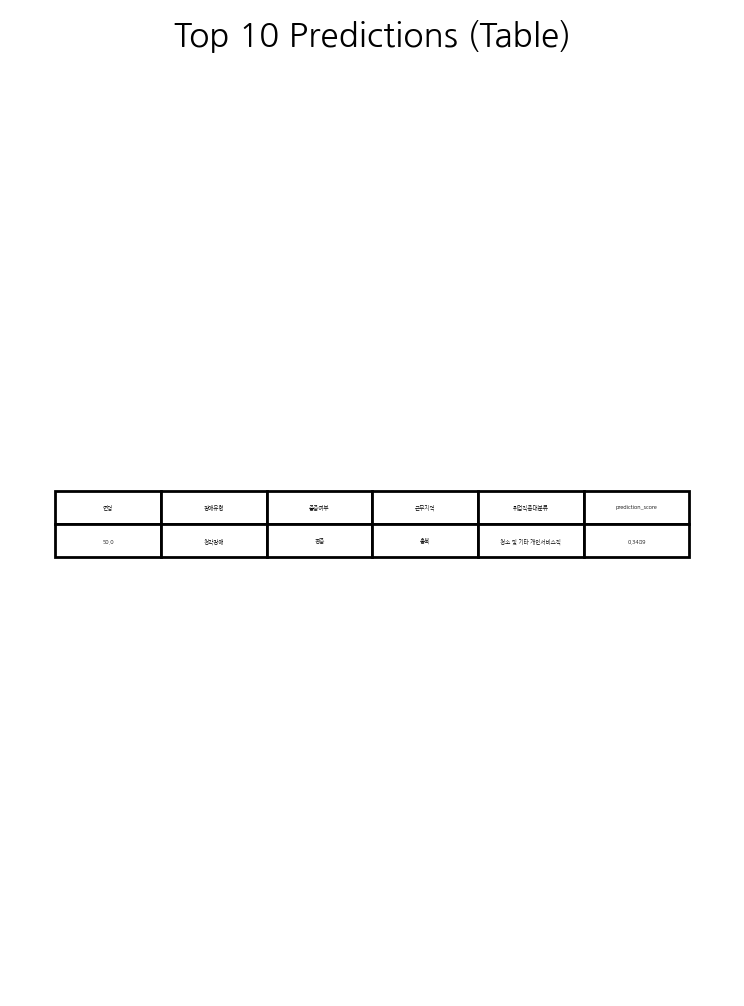

In [ ]:
# 시각화 (표)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Top 10 Predictions (Table)')
table_data = top_predictions[['연령', '장애유형', '중증여부', '근무지역', 'prediction_label', 'prediction_score']].values.tolist()
table_data.insert(0, ['연령', '장애유형', '중증여부', '근무지역', '취업직종대분류', 'prediction_score'])  # 컬럼명을 추가
plt.table(cellText=table_data,
          cellLoc='center',
          loc='center',
          colWidths=[0.15]*6,
          colLabels=None)
plt.axis('off')

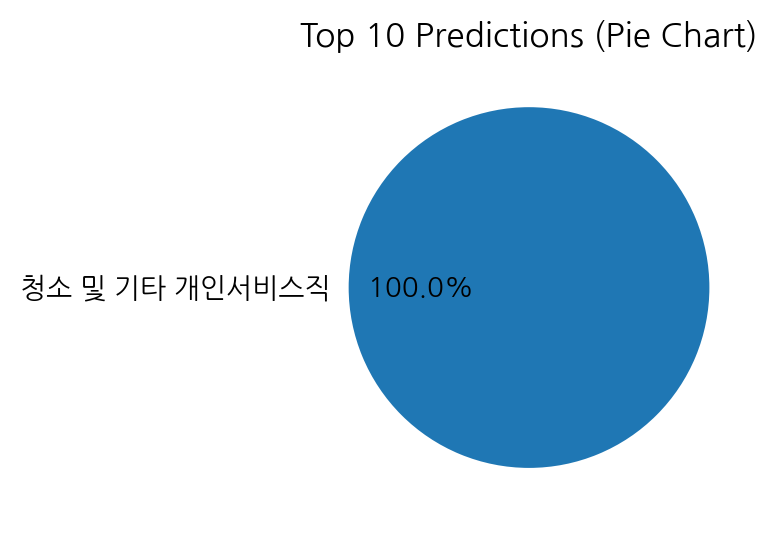

In [ ]:
# 시각화 (파이 차트)
plt.subplot(1, 2, 2)
plt.title('Top 10 Predictions (Pie Chart)')
plt.pie(top_predictions['prediction_score'] * 100, labels=top_predictions['prediction_label'], autopct='%1.1f%%')
plt.show()

In [ ]:
# 전체 ml_df를 바탕으로 예측을 수행하였을때 결과

     연령  장애유형 중증여부 근무지역 prediction_label  prediction_score
0  34.0  정신장애   경증   경기        경영·행정·사무직            0.4677


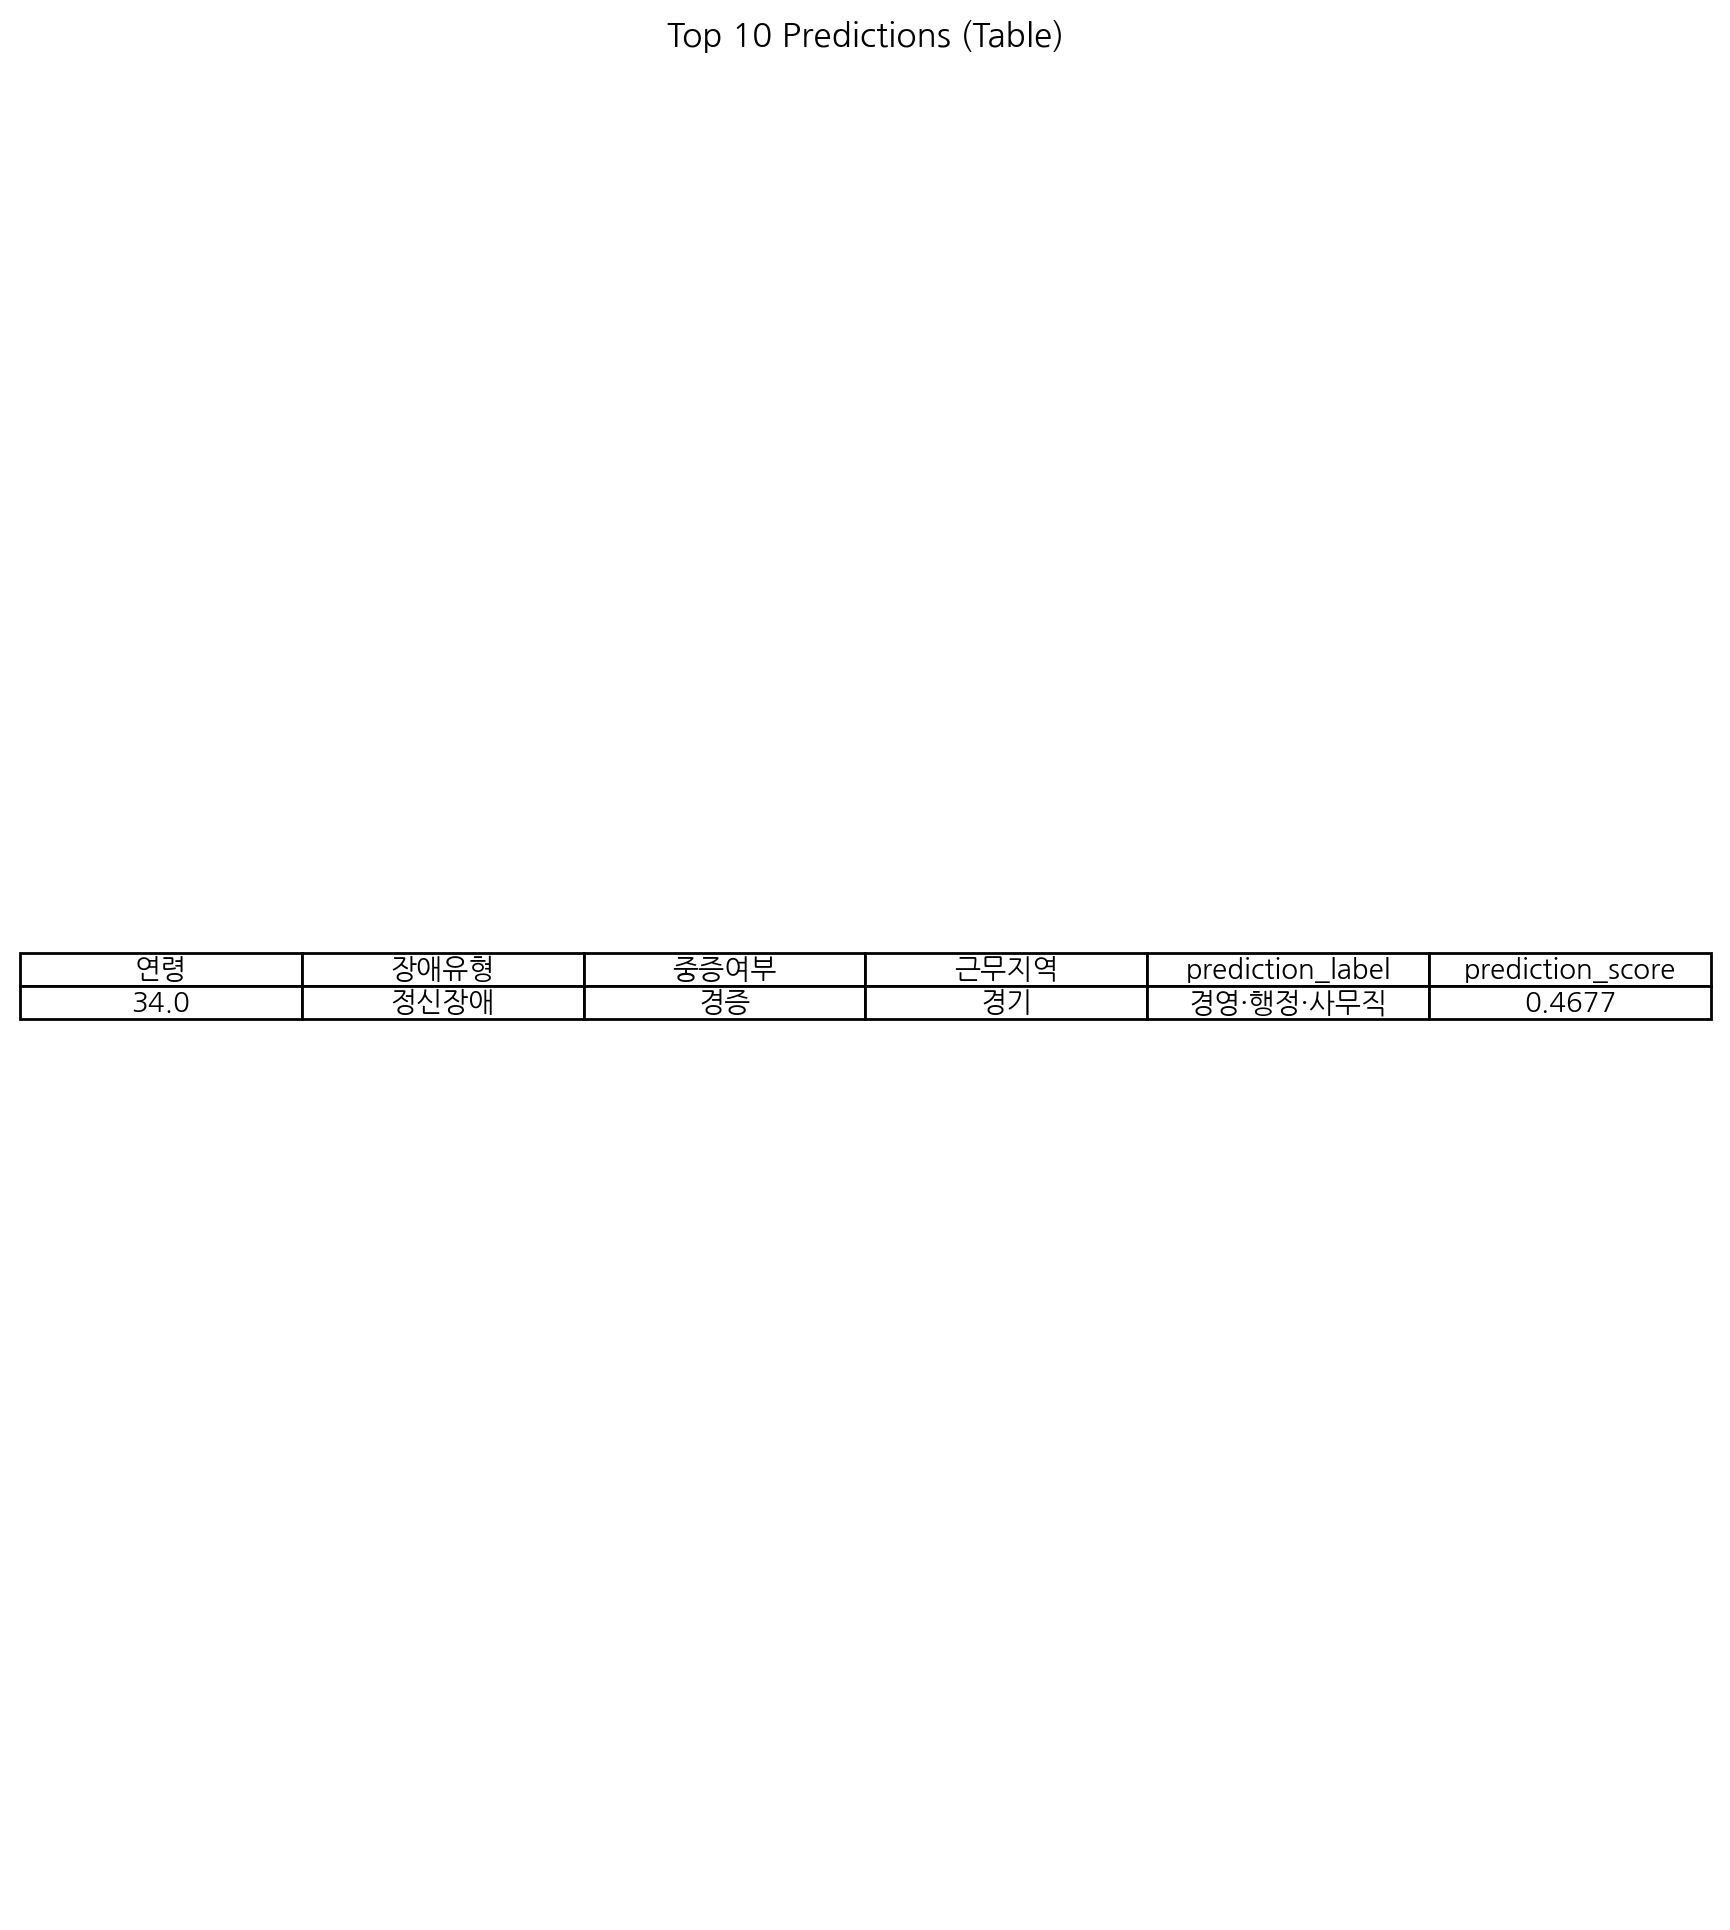

In [ ]:
# prediction_score 기준으로 정렬하여 상위 10개 선택
top_predictions = predictions.sort_values(by='prediction_score', ascending=False).head(10)

# 시각화 (표)
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
plt.title('Top 10 Predictions (Table)')
table_data = top_predictions.values.tolist()
table_data.insert(0, top_predictions.columns.tolist())  # 컬럼명을 추가
plt.table(cellText=table_data,
          cellLoc='center',
          loc='center',
          colWidths=[0.2]*len(top_predictions.columns),
          colLabels=None)
plt.axis('off')

# 선택된 데이터 출력
print(top_predictions)

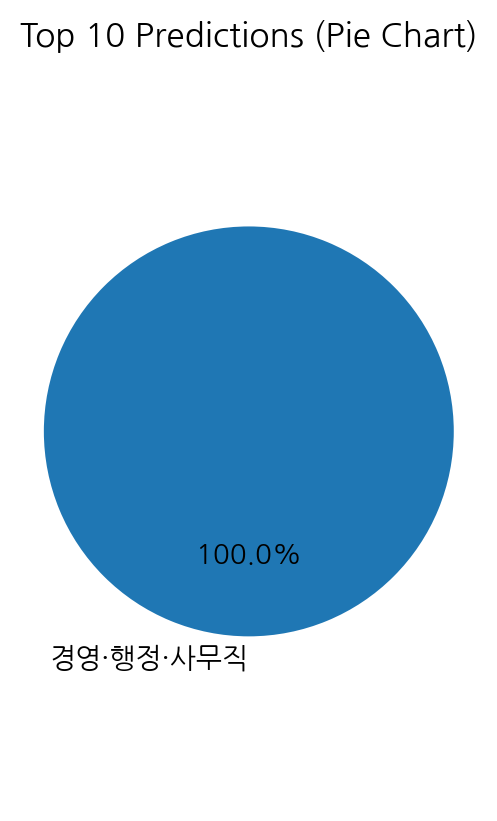

In [ ]:
# 시각화 (파이 차트)
plt.subplot(1, 2, 2)
plt.title('Top 10 Predictions (Pie Chart)')
plt.pie(top_predictions['prediction_score'], labels=top_predictions['prediction_label'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.show()

In [ ]:
# prediction_score 기준으로 정렬하여 상위 10개 선택
top_predictions = predictions.sort_values(by='prediction_score', ascending=False).head(10)

# 선택된 데이터를 출력
print(top_predictions)

# 시각화 (표)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Top 10 Predictions (Table)')
plt.table(cellText=top_predictions.values,
          colLabels=top_predictions.columns,
          cellLoc = 'center',
          loc='center')
plt.axis('off')

In [ ]:
# 한글 이거!!!!
!pip install koreanize-matplotlib
import koreanize_matplotlib

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

%matplotlib inline

# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 3.6 MB/s eta 0:00:00


### 전체 코드 flow

1. pip install pycaret
2. Library
3. Load Dataset
4. Setup Environment
5. Compare Models
6. Tune Models
7. Predict
8. Evaluation

## DALEX 이용해서 설명력 보충

In [ ]:
!pip uninstall scipy -y
!pip install scipy


# dalex 다운
!pip install dalex

Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
  Using cached scipy-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.2.0 requires scipy~=1.10.1, but you have scipy 1.11.4 which is incompatible.


In [ ]:
from dalex import Explainer

In [ ]:
explainer = Explainer(model=final_model, data=train.drop('취업직종대분류', axis=1), y=train['취업직종대분류'])


NameError: name 'train' is not defined

---

## 경현옵) 사용자로부터 입력

In [ ]:
user_input = {
    '연령': float(input("연령을 입력하세요: ")),
    '장애유형': input("장애유형을 입력하세요: "),
    '중증여부': input("중증여부를 입력하세요: "),
    '근무지역': input("근무지역을 입력하세요: "),
    '취업직종대분류': '과적합'
}

user_data = pd.DataFrame([user_input])
ml_df = ml_df.append(user_data, ignore_index=True)

# 결과 확인
print(ml_df)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = ml_df.iloc[:-1, :][['연령', '장애유형', '중증여부', '근무지역']]
y = ml_df.iloc[:-1, :]['취업직종대분류']
label_encoder = LabelEncoder()

X['장애유형'] = label_encoder.fit_transform(X['장애유형'])
X['중증여부'] = label_encoder.fit_transform(X['중증여부'])
X['근무지역'] = label_encoder.fit_transform(X['근무지역'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
last_row_X = X.iloc[-1:].copy()

class_probabilities = model.predict_proba(last_row_X)
top_classes_indices = np.argsort(class_probabilities[0])[::-1][:3]

for index in top_classes_indices:
    class_label = model.classes_[index]
    probability = class_probabilities[0, index]
    print(f'{class_label}: {probability * 100:.2f}%')

# 시각화 (파이 차트)
fig, ax = plt.subplots(figsize=(8, 4))
ax.pie(class_probabilities[0, top_classes_indices] * 100, labels=model.classes_[top_classes_indices], autopct='%1.1f%%', colors=['blue', 'green', 'orange'])
ax.set_title('내 이력으로 알아본 이력 확률')

plt.show()
